<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/drive')

dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajęcia_1/Dzien 1/kc_house_data.csv'

df = pd.read_csv(dataset_path)
df.head(15)

Mounted at /drive


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
housing_df = df.copy()

In [38]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [4]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
housing_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [6]:
# Drop uninformative columns
housing_df = housing_df.drop(["id", "date"], axis=1)

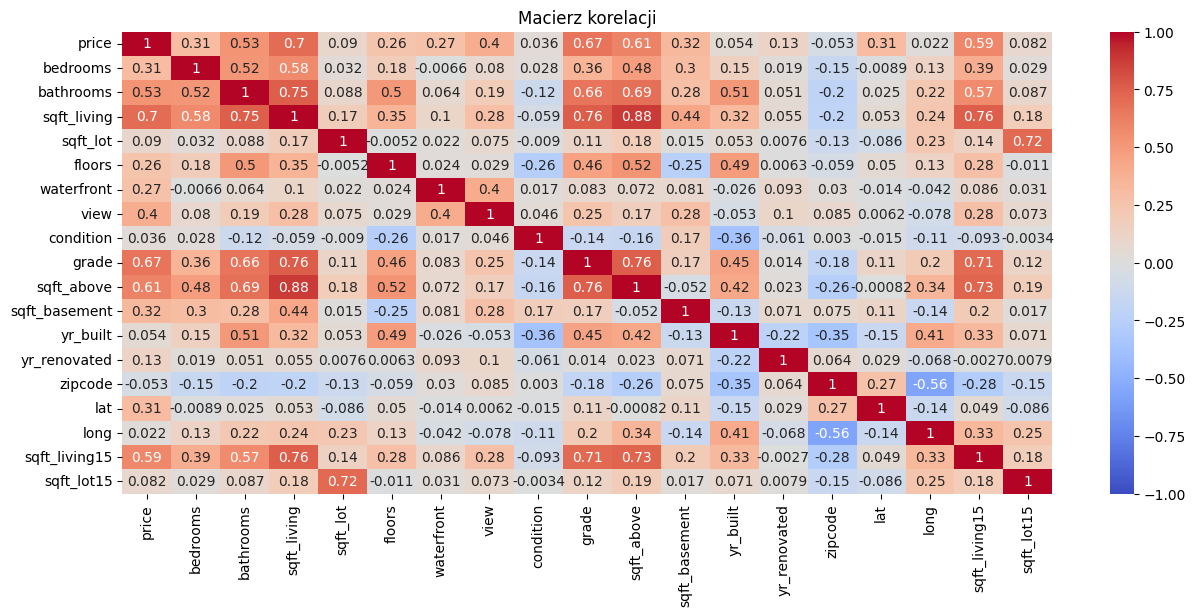

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = housing_df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Macierz korelacji")
plt.show()

Korelacja grade vs price: 0.6674342560202365


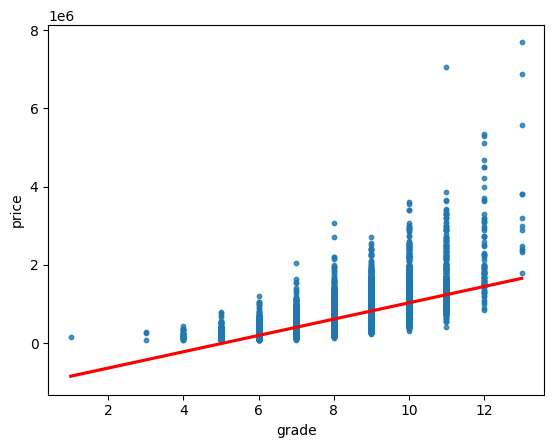

Korelacja sqft_living vs price: 0.7020350546118002


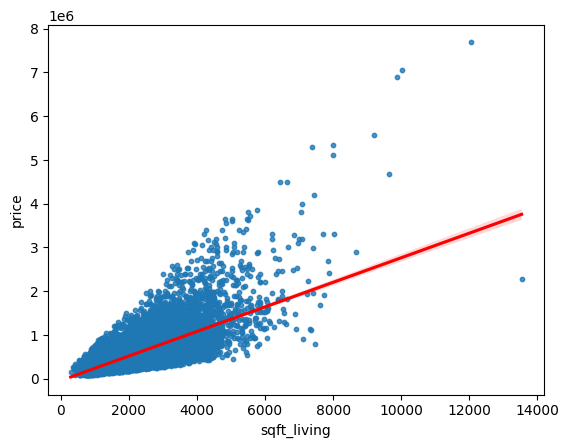

In [51]:
sns.regplot(x='grade', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

grade_corr = housing_df['grade'].corr(housing_df['price'])
y  = print(f"Korelacja grade vs price: {grade_corr}")
plt.title(y)
plt.show()

sns.regplot(x='sqft_living', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

sqft_living_corr = housing_df['sqft_living'].corr(housing_df['price'])
x  = print(f"Korelacja sqft_living vs price: {sqft_living_corr}")
plt.title(x)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


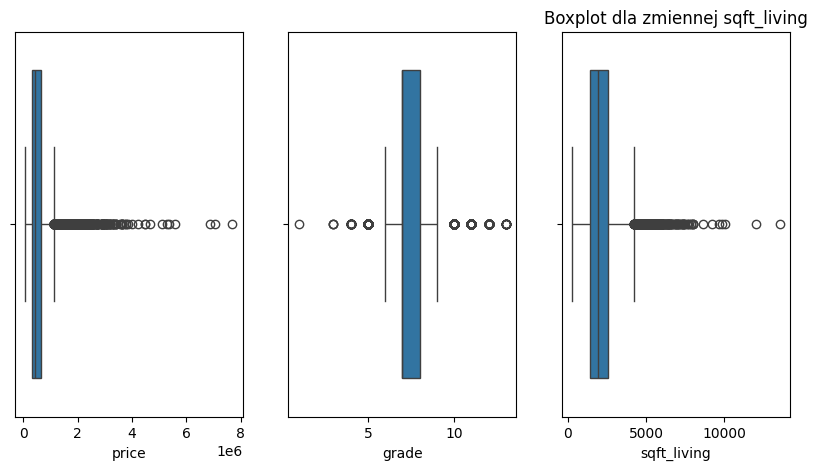

In [61]:
# Wykres pudełkowy

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5))

sns.boxplot(x=df['price'], ax= ax1)
plt.title('Boxplot dla zmiennej price')



sns.boxplot(x=df['grade'], ax=ax2)
plt.title('Boxplot dla zmiennej grade')


sns.boxplot(x=df['sqft_living'], ax= ax3)
plt.title('Boxplot dla zmiennej sqft_living')


plt.show()



In [64]:
df = housing_df.copy()

In [68]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definiowanie dolnej i górnej granicy
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrowanie danych, usuwanie wartości odstających
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Liczba obserwacji przed usunięciem wartości odstających: {len(df)}")
print(f"Liczba obserwacji po usunięciu wartości odstających: {len(df_filtered)}")

df = df_filtered

Q1 = df['grade'].quantile(0.25)
Q3 = df['grade'].quantile(0.75)
IQR = Q3 - Q1

# Definiowanie dolnej i górnej granicy
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrowanie danych, usuwanie wartości odstających
df_filtered = df[(df['grade'] >= lower_bound) & (df['grade'] <= upper_bound)]

print(f"Liczba obserwacji przed usunięciem wartości odstających: {len(df)}")
print(f"Liczba obserwacji po usunięciu wartości odstających: {len(df_filtered)}")

df = df_filtered

Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

# Definiowanie dolnej i górnej granicy
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrowanie danych, usuwanie wartości odstających
df_filtered = df[(df['sqft_living'] >= lower_bound) & (df['sqft_living'] <= upper_bound)]

print(f"Liczba obserwacji przed usunięciem wartości odstających: {len(df)}")
print(f"Liczba obserwacji po usunięciu wartości odstających: {len(df_filtered)}")

df = df_filtered

Liczba obserwacji przed usunięciem wartości odstających: 21613
Liczba obserwacji po usunięciu wartości odstających: 20467
Liczba obserwacji przed usunięciem wartości odstających: 20467
Liczba obserwacji po usunięciu wartości odstających: 19280
Liczba obserwacji przed usunięciem wartości odstających: 19280
Liczba obserwacji po usunięciu wartości odstających: 19056


Korelacja grade vs price: 0.5453194994728994


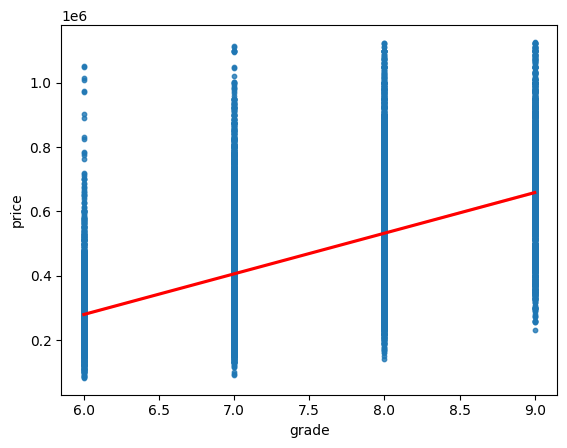

Korelacja sqft_living vs price: 0.5447041642612297


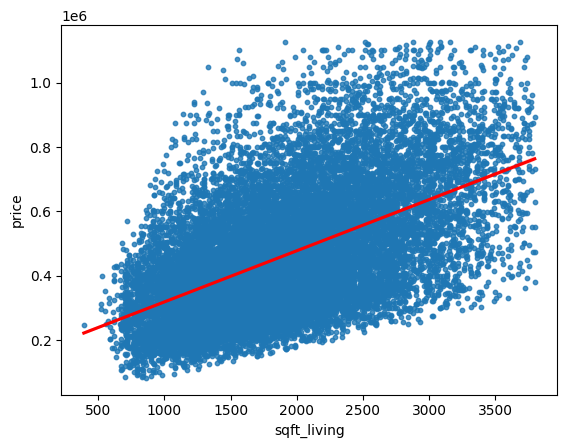

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


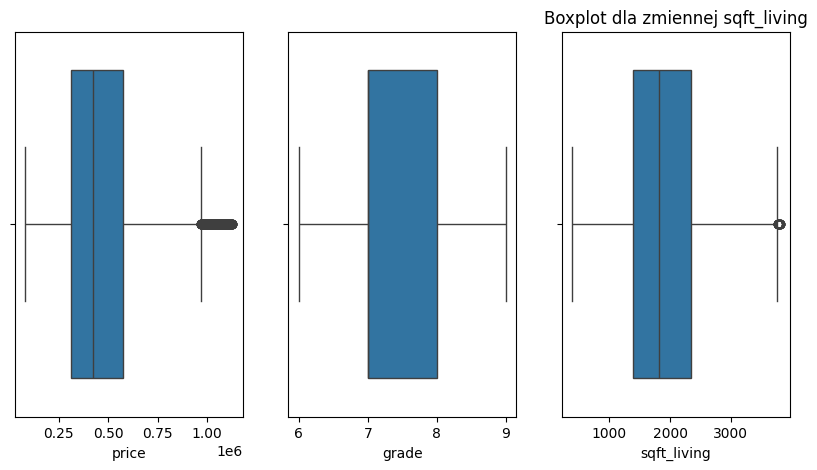

In [69]:
sns.regplot(x='grade', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

grade_corr = df['grade'].corr(df['price'])
y  = print(f"Korelacja grade vs price: {grade_corr}")
plt.title(y)
plt.show()

sns.regplot(x='sqft_living', y='price', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

sqft_living_corr = df['sqft_living'].corr(df['price'])
x  = print(f"Korelacja sqft_living vs price: {sqft_living_corr}")
plt.title(x)
plt.show()

# Wykres pudełkowy

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5))

sns.boxplot(x=df['price'], ax= ax1)
plt.title('Boxplot dla zmiennej price')



sns.boxplot(x=df['grade'], ax=ax2)
plt.title('Boxplot dla zmiennej grade')


sns.boxplot(x=df['sqft_living'], ax= ax3)
plt.title('Boxplot dla zmiennej sqft_living')


plt.show()

In [70]:
housing_df = df

In [71]:
from sklearn.model_selection import train_test_split

X = housing_df.drop("price", axis=1)
y = housing_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression

# Initialize linear regression model
lin_reg = LinearRegression()

In [73]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [74]:
# Array of coefficents from a1 to a18. a1 stands for coeficient for "bedrooms", a2 - "bathrooms" etc.
# The order of the coefficients coincides with the order of the variables in the data set
print(f"Coefficients values: {lin_reg.coef_}")

# Intercept coefficient
print(f"Intercept coefficient value: {lin_reg.intercept_}")

Coefficients values: [-1.11150549e+04  2.47763482e+04  5.14586430e+01  2.54823652e-01
  3.09506148e+04  1.16795493e+05  3.18548277e+04  2.59174499e+04
  7.57402822e+04  2.37781461e+01  2.76804969e+01 -1.82319704e+03
  1.65151453e+01 -2.21135496e+02  5.39382134e+05 -4.88640147e+04
  4.75123285e+01 -2.01248508e-01]
Intercept coefficient value: -6831609.6890809685


In [75]:
# Predict y values based on features in test set
y_pred = lin_reg.predict(X_test)

# Print R2 score value with .score() method
print(f"R2 score: {lin_reg.score(X_test, y_test)}") # or X_train, y_train for training set score

# Alternatively - R2 score using r2_score from sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))


R2 score: 0.6442403803567611
0.6442403803567611


In [77]:
# Get standarized features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_train_std, y_train)
print(f'std: {lin_reg_std.score(X_test_std, y_test)}')
# Get normalized features

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalized_X_train = normalizer.transform(X_train)
normalized_X_test = normalizer.transform(X_test)

lin_reg_norm = LinearRegression()
lin_reg_norm.fit(normalized_X_train, y_train)
print(f'norm: {lin_reg_norm.score(normalized_X_test, y_test)}')

std: 0.644240380356755
norm: 0.6510583821642528


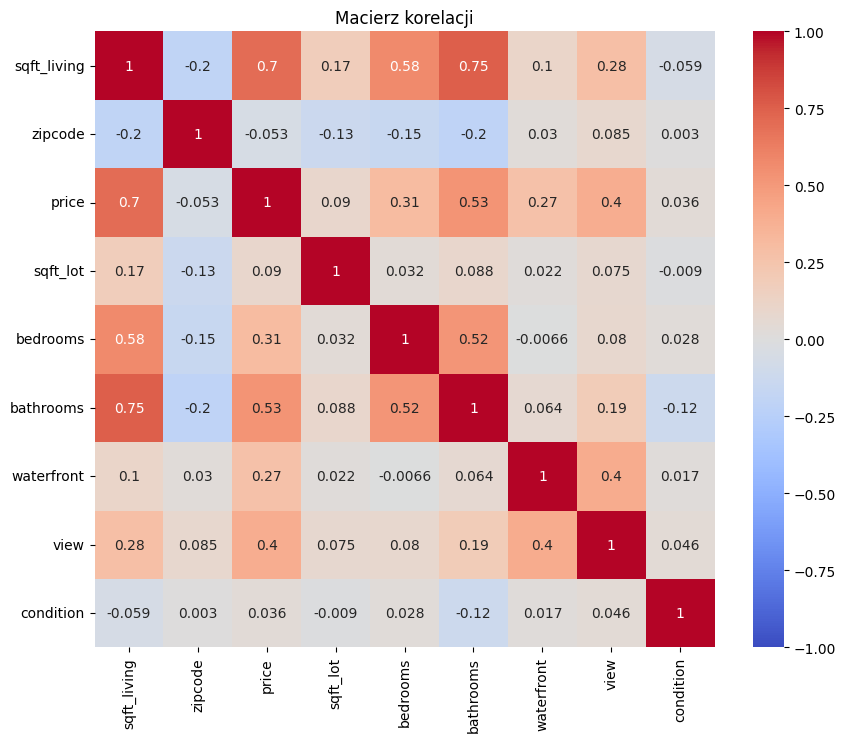

In [47]:
selected_columns = ['sqft_living', 'zipcode', 'price', 'sqft_lot', 'bedrooms', 'bathrooms', 'waterfront',	'view',	'condition']
correlation_matrix = housing_df[selected_columns].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Macierz korelacji")
plt.show()
